<a href="https://colab.research.google.com/github/thetanishqarora/Track-Your-Health-Module-Heart/blob/main/Track_Your_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project- Track Your Health: Heart Module

Importing the Dependencies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display

In [8]:
#Function to load and preprocess the data
def load_data():
  heart_data = pd.read_csv('/content/heart.csv')
  return heart_data

Data Collection and Processing

In [9]:
#load the csv to a pandas dataframe
heart_data = load_data()

Data Exploration

In [10]:
#print first 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#print last 5 rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
#rows and columns
heart_data.shape

(303, 14)

In [13]:
#getting some infro from dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#checking null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
#exploring some statistical data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#Distinguishing among healthy and unhealthy hearts from the dataset(1-U,0-H)
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [17]:
heart_data['target'].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

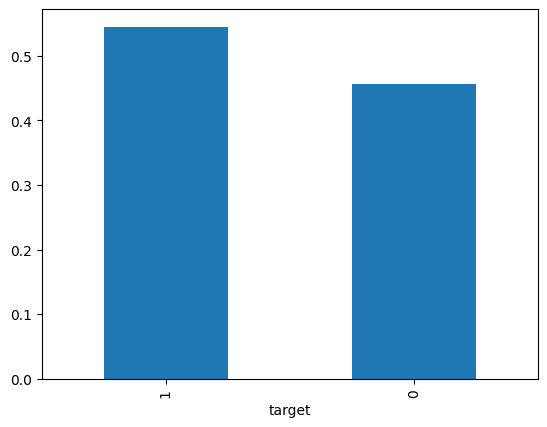

In [18]:
heart_data['target'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [19]:
heart_data.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


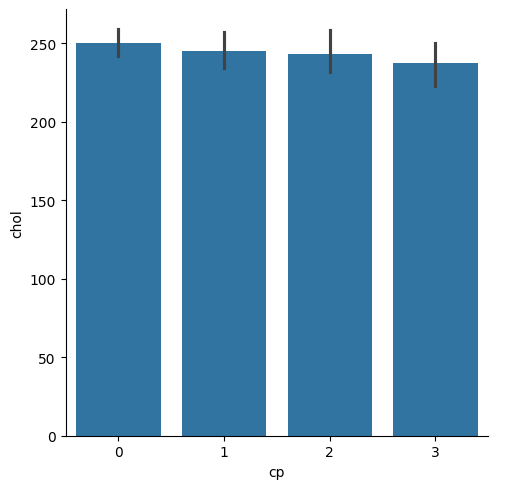

In [20]:
sns.catplot(data=heart_data, x='cp', y='chol', kind='bar')
plt.show()

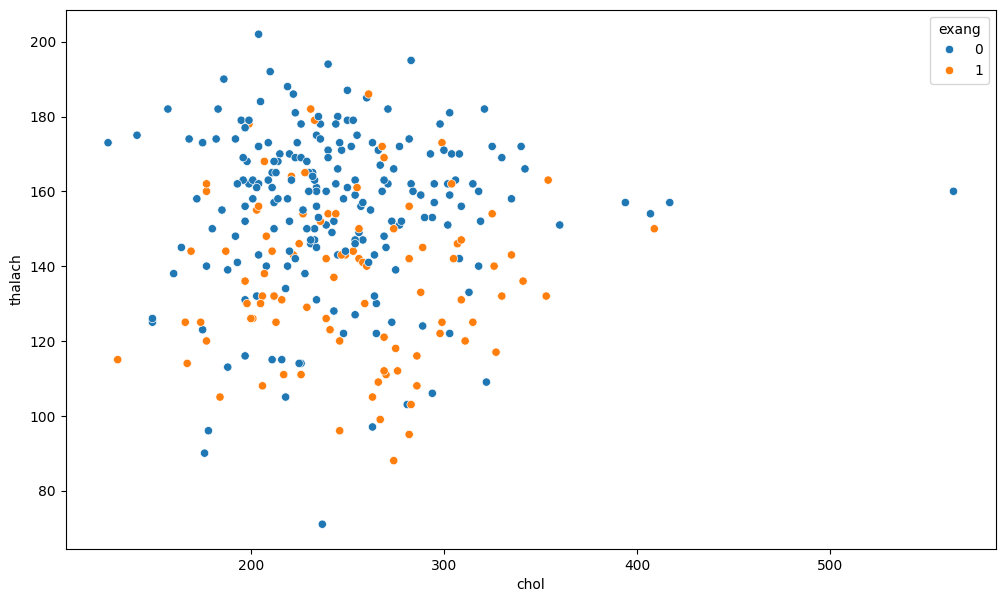

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=heart_data,y='thalach',x='chol',hue='exang')
plt.show()

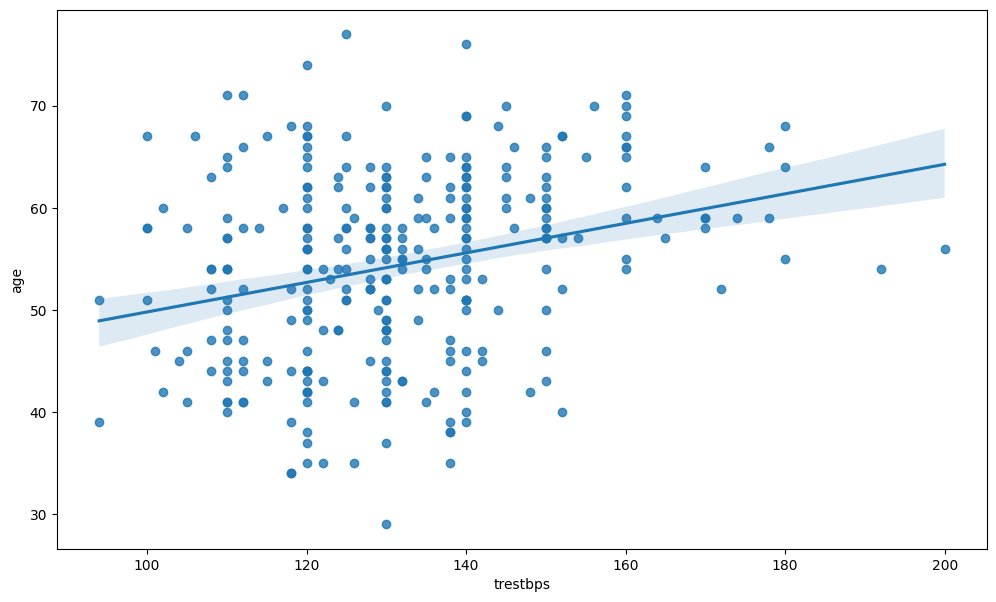

In [22]:
plt.figure(figsize=(12,7))
sns.regplot(data=heart_data,y='age',x='trestbps')
plt.show()

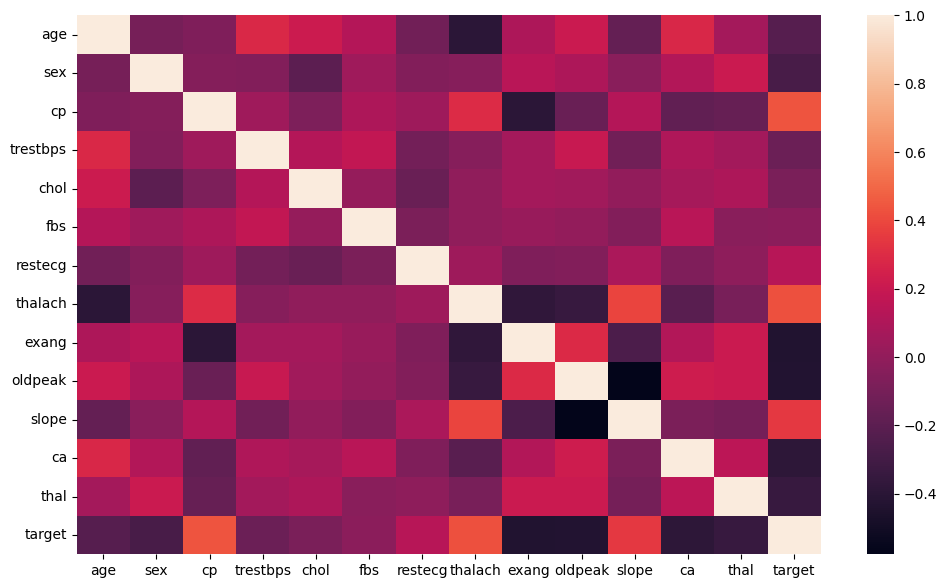

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(heart_data.corr())
plt.show()

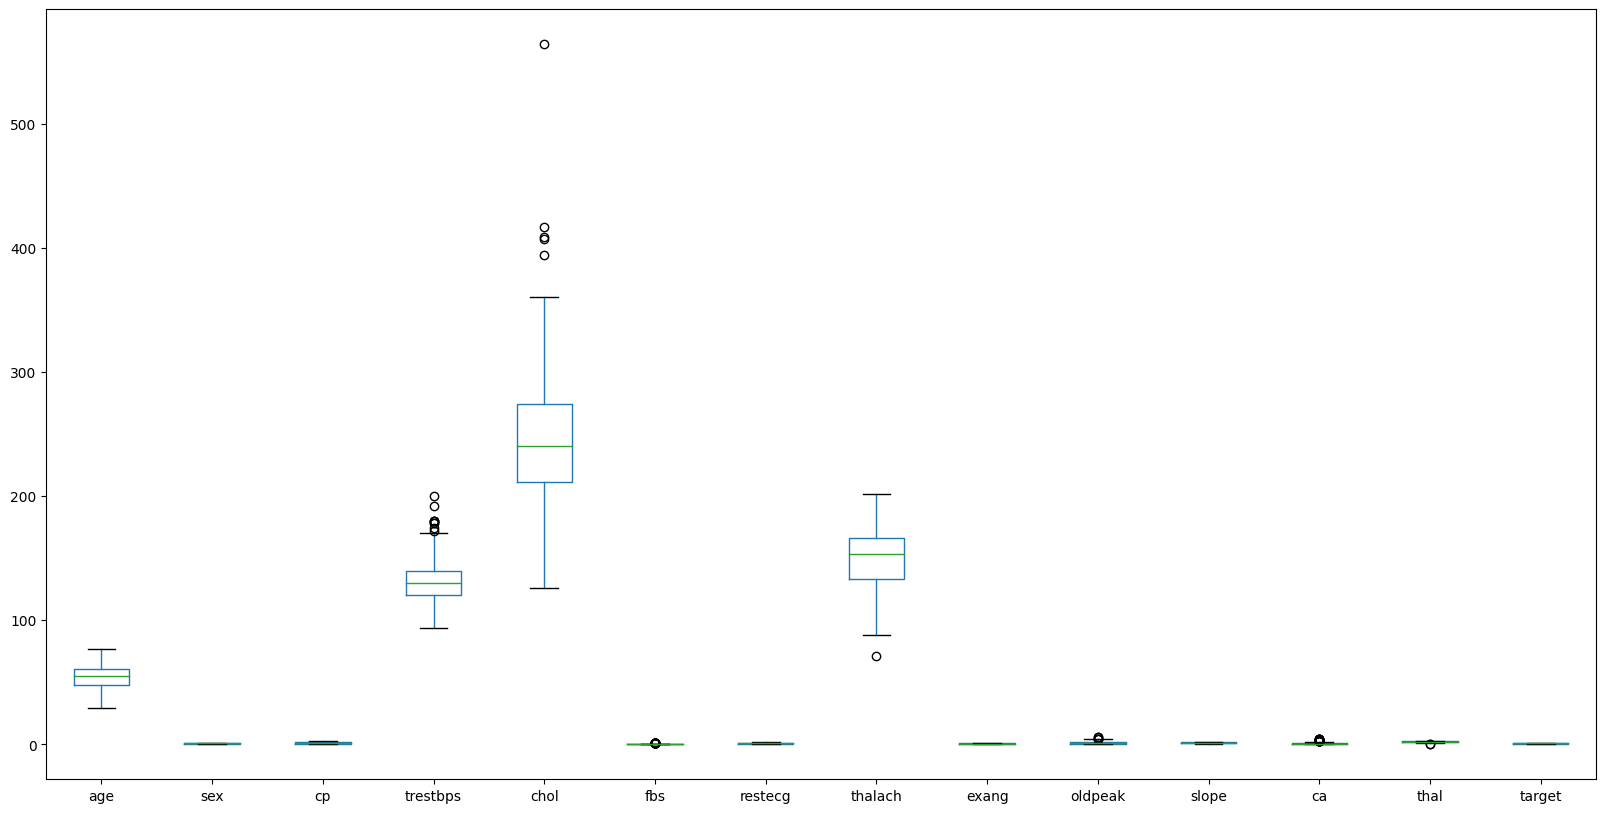

In [24]:
plt.figure(figsize=(20,10))
heart_data.boxplot(grid=False)
plt.show()

Note:

1--> Unhealthy Heart

0--> Healthy Heart

Splitting the Features and Targets

In [25]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [26]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [27]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Spliting the data into Training data and Test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [29]:
#checking the split
print(X.shape, X_train.shape, X_test.shape)
# 80% data will go to X_train and 20% of data will go to X_test

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [30]:
# Function to load and preprocess the data
def train_model(X_train,Y_train):
  model = LogisticRegression()
  model.fit(X_train, Y_train)
  return model

In [31]:
model = train_model(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

Accuracy Score

In [32]:
#calculating the accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
#printing the accuracy rate on training data
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.8512396694214877


In [34]:
#calculating the accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
#printing the accuracy rate on testing data
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.819672131147541


Building a Predictive System

In [36]:
#Creating an Interface
def diagnose_heart_disease(model):
    # Creating input widgets
    age_input = widgets.Text(description="Age:")
    sex_input = widgets.Text(description="Sex:")
    cp_input = widgets.Text(description="Chest Pain:")
    trestbps_input = widgets.Text(description="Resting Blood Pressure:")
    chol_input = widgets.Text(description="Serum Cholesterol:")
    fbs_input = widgets.Text(description="Fasting Blood Sugar:")
    restecg_input = widgets.Text(description="Resting Electrocardiographic Results:")
    thalach_input = widgets.Text(description="Maximum Heart Rate Achieved:")
    exang_input = widgets.Text(description="Exercise Induced Angina:")
    oldpeak_input = widgets.Text(description="ST Depression Induced by Exercise:")
    slope_input = widgets.Text(description="Slope of the Peak Exercise ST Segment:")
    ca_input = widgets.Text(description="Number of Major Vessels:")
    thal_input = widgets.Text(description="Thal:")

    # Creating a button widget
    button = widgets.Button(description="Diagnose")

    # Displaying the widgets
    display(age_input, sex_input, cp_input, trestbps_input, chol_input, fbs_input,
            restecg_input, thalach_input, exang_input, oldpeak_input, slope_input,
            ca_input, thal_input, button)

    # Output widget to display the result
    result_output = widgets.Output()
    display(result_output)

    # Function to handle button click event
    def on_button_click(b):
        # Retrieving input values from text boxes
        age = int(age_input.value)
        sex = int(sex_input.value)
        cp = int(cp_input.value)
        trestbps = int(trestbps_input.value)
        chol = int(chol_input.value)
        fbs = int(fbs_input.value)
        restecg = int(restecg_input.value)
        thalach = int(thalach_input.value)
        exang = int(exang_input.value)
        oldpeak = float(oldpeak_input.value)
        slope = int(slope_input.value)
        ca = int(ca_input.value)
        thal = int(thal_input.value)

        # Storing input data
        input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

        # Convert the input tuple data into numpy array
        input_data_as_numpy_array = np.asarray(input_data)

        # Reshaping the numpy array for single instance prediction
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Actual diagnosis
        prediction = model.predict(input_data_reshaped)

        # Displaying the result
        with result_output:
            result_output.clear_output()
            if prediction[0] == 0:
                print("No, the person doesn't have heart disease.")
            else:
                print("Yes, the person does have heart disease.")

    # Handling button click event
    button.on_click(on_button_click)


Calling the Interface

In [37]:
diagnose_heart_disease(model)

Text(value='', description='Age:')

Text(value='', description='Sex:')

Text(value='', description='Chest Pain:')

Text(value='', description='Resting Blood Pressure:')

Text(value='', description='Serum Cholesterol:')

Text(value='', description='Fasting Blood Sugar:')

Text(value='', description='Resting Electrocardiographic Results:')

Text(value='', description='Maximum Heart Rate Achieved:')

Text(value='', description='Exercise Induced Angina:')

Text(value='', description='ST Depression Induced by Exercise:')

Text(value='', description='Slope of the Peak Exercise ST Segment:')

Text(value='', description='Number of Major Vessels:')

Text(value='', description='Thal:')

Button(description='Diagnose', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
